## Movie Review Analysis using Word2Vec

<a href='https://www.youtube.com/c/ShashiSAS'> <img src='word2vec_flow.jpg' class="center"></a>

In [ ]:
#Import Data 
import pandas as pd
df = pd.read_csv('movie-Review.csv')

In [3]:
import numpy as np
np.random.seed(500)

       text
class      
Neg    1000
Pos    1000


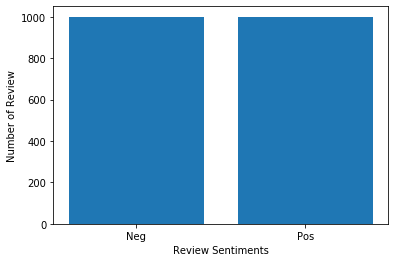

In [4]:
class_count=df.groupby('class').count()
print(class_count)
import matplotlib.pyplot as plt
plt.bar(class_count.index.values, class_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [5]:
#Remove number
import re # import all Regular expression functions
df['text']=[re.sub('\d','', i)for i in df['text']]
df.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [6]:
# Replace punctuations with a white space
import string
df['text']=[re.sub('[%s]' % re.escape(string.punctuation), ' ', i) for i in df['text']]
df.head(10)

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...
5,Pos,on june a self taught idealistic ye...
6,Pos,apparently director tony kaye had a major b...
7,Pos,one of my colleagues was surprised when i tol...
8,Pos,after bloody clashes and independence won l...
9,Pos,the american action film has been slowly drow...


In [7]:
#Convert into in lower case
df['text']=[i.lower() for i in df['text']]

In [8]:
# import pandas as pd 
import pandas as pd 
#Word Tokenization
import nltk # import package for tokenization
#nltk.download('punkt') # download all spporting function /files for NLTK package
from nltk.tokenize import word_tokenize
df['text_wt'] = [word_tokenize(i) for i in df['text']]
df.head()

,class,text,text_wt
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge..."


In [9]:
#To show the stop words
#nltk.download('stopwords') #download Stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
#Remove All Stop Word
df['text_SW'] = [[i for i in j if not i in stop_words] for j in df['text_wt']]# remove the word which is aviable in stopword libr
df.head()

,class,text,text_wt,text_SW
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl..."


In [10]:
#nltk.download('tagsets')
#nltk.help.upenn_tagset()# tagset documentation
#nltk.download('wordnet')
from collections import defaultdict #Default Dictionary is imported from collections
from nltk.corpus import wordnet as wn #the corpus reader wordnet is imported.
from nltk.tag import pos_tag
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. 
#By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN) #Dictionary is created where pos_tag (first letter) are the key values 
tag_map['J'] = wn.ADJ                   #whose values are mapped with the value 
tag_map['V'] = wn.VERB                  #from wordnet dictionary. We have taken the only first letter as 
tag_map['R'] = wn.ADV
# we will use it later in the loop.
#tag_map

In [11]:
#nltk.download('averaged_perceptron_tagger')
#lemmatization
from nltk.stem import WordNetLemmatizer 
 # Initializing WordNetLemmatizer()
lemmatizer = WordNetLemmatizer()

df['lemma']=[[lemmatizer.lemmatize(word,tag_map[tag[0]]) for word ,tag in pos_tag(i)] for i in df['text_SW']] 
df.head()

,class,text,text_wt,text_SW,lemma
0,Pos,films adapted from comic books have had plent...,"[films, adapted, from, comic, books, have, had...","[films, adapted, comic, books, plenty, success...","[film, adapt, comic, book, plenty, success, wh..."
1,Pos,every now and then a movie comes along from a...,"[every, now, and, then, a, movie, comes, along...","[every, movie, comes, along, suspect, studio, ...","[every, movie, come, along, suspect, studio, e..."
2,Pos,you ve got mail works alot better than it des...,"[you, ve, got, mail, works, alot, better, than...","[got, mail, works, alot, better, deserves, ord...","[get, mail, work, alot, good, deserves, order,..."
3,Pos,jaws is a rare film that grabs your atte...,"[jaws, is, a, rare, film, that, grabs, your, a...","[jaws, rare, film, grabs, attention, shows, si...","[jaw, rare, film, grab, attention, show, singl..."
4,Pos,moviemaking is a lot like being the general m...,"[moviemaking, is, a, lot, like, being, the, ge...","[moviemaking, lot, like, general, manager, nfl...","[moviemaking, lot, like, general, manager, nfl..."


In [12]:
 df['lemma2']= df['lemma'].apply(lambda x: ' '.join(x))

In [13]:
df['lemma2'].head()

0    film adapt comic book plenty success whether s...
1    every movie come along suspect studio every in...
2    get mail work alot good deserves order make fi...
3    jaw rare film grab attention show single image...
4    moviemaking lot like general manager nfl team ...
Name: lemma2, dtype: object

class gensim.models.word2vec.Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
    
Min_count: It will ignore all the words with a total frequency lower than this.
Size: It tells the dimensionality of the word vectors.
Workers: These are the threads to train the model
Window: Maximum distance between the current and predicted word within a sentence.
Sg: It is a training algorithm and 1 for skip-gram and 0 for a Continuous bag of words. 
Hs: If this is 1 then we are using hierarchical softmax for training and if 0 then negative sampling is used.
Alpha: Initial learning rate

In [14]:
#Train a Word2Vec model using Gensim
import gensim
Min_count=1      #It will ignore all the words with a total frequency lower than this
Size = 200      #It tells the dimensionality of the word vectors
Workers=4        #These are the threads to train the model
Window=5         #Maximum distance between the current and predicted word within a sentence
#train word2vec model
model = gensim.models.Word2Vec(sentences = df['lemma'], size = Size,window=Window, workers = Workers, min_count = Min_count)
#Vocabulary size
words = list(model.wv.vocab)
print('Here is the Vocabulary Size.. %d' % len(words))

Here is the Vocabulary Size.. 32325


In [15]:
#first 10 words
words[1:10]

['adapt',
 'comic',
 'book',
 'plenty',
 'success',
 'whether',
 'superheroes',
 'batman',
 'superman']

In [16]:
# This will print the most similar words  present in the model
model.most_similar("film")

C:\Users\Shashi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


[('movie', 0.9607198238372803),
 ('picture', 0.9193545579910278),
 ('flick', 0.9138396978378296),
 ('moment', 0.9018254280090332),
 ('sequence', 0.896909236907959),
 ('comedy', 0.8907702565193176),
 ('genre', 0.8868932127952576),
 ('credit', 0.8852279782295227),
 ('thriller', 0.8828378915786743),
 ('pervasive', 0.8828272819519043)]

In [17]:
# Importing bokeh libraries for showing how words of similar context are grouped together
import bokeh.plotting as bp
from bokeh.models import HoverTool, BoxSelectTool
from bokeh.plotting import figure, show, output_notebook
import matplotlib.pyplot as plt

voc_size=3000
#Defining the chart
output_notebook()
plot_chart = bp.figure(plot_width=700, plot_height=600, title="A map/plot of 3000 word vectors",
    tools="pan,wheel_zoom,box_zoom,reset,hover",
    x_axis_type=None, y_axis_type=None, min_border=1)

#Extracting the list of word vectors, limiting to 1000, each is of 200 dimensions
word_vectors = [model[w] for w in list(model.wv.vocab.keys())[:voc_size]]

# Reducing dimensionality by converting the vectors to 2d vectors
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, verbose=1, random_state=0)
tsne_w2v = tsne_model.fit_transform(word_vectors)

# Storing data in a dataframe
tsne_df = pd.DataFrame(tsne_w2v, columns=['x', 'y'])
tsne_df['words'] = list(model.wv.vocab.keys())[:voc_size]

# Corresponding word appears when you hover on the data point.
plot_chart.scatter(x='x', y='y', source=tsne_df)
hover = plot_chart.select(dict(type=HoverTool))
hover.tooltips={"word": "@words"}
show(plot_chart)

Loading BokehJS ...

C:\Users\Shashi\anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3000 samples in 0.267s...
[t-SNE] Computed neighbors for 3000 samples in 3.305s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3000
[t-SNE] Computed conditional probabilities for sample 2000 / 3000
[t-SNE] Computed conditional probabilities for sample 3000 / 3000
[t-SNE] Mean sigma: 0.052500
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.422470
[t-SNE] KL divergence after 1000 iterations: 0.906188


Next we have to build word vectors for input text in order to average the value of all word vectors using the following function:

In [18]:
import numpy as np 
#Build word vector set by using the average value of all word vectors , then scale
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size)) #As word vectors are of zero length size value(i.e 300) 
    count = 0 # no. of words with a valid vector in the sentence/review
    for word in text: #for each word in a sentence/review
        try:
            vec += model[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

Scaling moves our data set is part of the process of standardization where we move our dataset into a gaussian distribution with a mean of zero, meaning that values above the mean will be positive, and those below the mean will be negative. Many ML models require scaled datasets to perform effectively, especially those with many features (like text classifiers).

In [19]:
from sklearn.preprocessing import scale
vecs = np.concatenate([buildWordVector(z, Size) for z in df['lemma']])
#print("Before Scaling:",vecs[1:2])
vecs = scale(vecs)
#print("After Scaling:",vecs[1:2])

C:\Users\Shashi\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [20]:
print("Dimension of vector :",vecs.shape)

Dimension of vector : (2000, 200)


In [21]:
#Convert Target varible in numerical form using label encoder method
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
df['class2'] = Encoder.fit_transform(df['class'])
print(df['class2'].head())


0    1
1    1
2    1
3    1
4    1
Name: class2, dtype: int32


In [22]:
#Split dataset in Train and Test:
#test_size=0.2 (Dataset split ,Test dataset 20% Train dataset =80%)
#random_state=342 :Providing a value to random state will be helpful in reproducing the same values 
                   #in the split when you re-run the program
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(vecs,df['class2'],test_size=0.2,random_state=342)

In [23]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
from sklearn import model_selection,  svm
from sklearn.metrics import accuracy_score
SVM = svm.SVC(C=1.0, kernel='linear')
SVM.fit(Train_X,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",round(accuracy_score(predictions_SVM, Test_Y)*100,2),"%")

SVM Accuracy Score ->  79.0 %


In [24]:
# Logistic Regression Model:-
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
# 2. instantiate a logistic regression model
logreg = LogisticRegression()
# 3. train the model using X_train_dtm
%time logreg.fit(Train_X, Train_Y)#4. make class predictions for Test_X
predictions_log = logreg.predict(Test_X)

print(" ------ Confusion Matrix-----[TN FP  FN TP]")

print(metrics.confusion_matrix(predictions_log, Test_Y))
print(metrics.classification_report(predictions_log, Test_Y))
# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score -> ",round(accuracy_score(predictions_log, Test_Y)*100,2),"%")
print("Logistic Regression Area under curve -> ",round(metrics.roc_auc_score(predictions_log, Test_Y),2))

Wall time: 422 ms
 ------ Confusion Matrix-----[TN FP  FN TP]
[[156  37]
 [ 51 156]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       193
           1       0.81      0.75      0.78       207

    accuracy                           0.78       400
   macro avg       0.78      0.78      0.78       400
weighted avg       0.78      0.78      0.78       400

Logistic Regression Accuracy Score ->  78.0 %
Logistic Regression Area under curve ->  0.78


C:\Users\Shashi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Neural Network

In [25]:
import tensorflow as tf
import keras.layers as layers
from keras.models import Model

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input,Embedding,Dense,Flatten
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import f1_score

epochs = 30
batch_size = 200
loss = "binary_crossentropy"
optimizer = "adam"
metrics = ["accuracy"]

from keras import models

callbacks = [EarlyStopping(monitor='val_loss', patience=2),
            ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(200,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss=loss,optimizer=optimizer,metrics= metrics)
model.fit(Train_X,Train_Y,epochs=epochs,batch_size=batch_size,callbacks=callbacks,validation_data=(Test_X,Test_Y))


predictions = model.predict(Test_X)
predictions = [0 if i<0.5 else 1 for i in predictions]

f1_score(Test_Y, predictions)
print("Accuracy: ",accuracy_score(Test_Y,predictions)*100)


Epoch 1/30
8/8 [==============================] - 1s 102ms/step - loss: 0.7636 - accuracy: 0.5594 - val_loss: 0.6589 - val_accuracy: 0.6275
Epoch 2/30
8/8 [==============================] - 0s 12ms/step - loss: 0.6667 - accuracy: 0.6100 - val_loss: 0.6697 - val_accuracy: 0.6025
Epoch 3/30
8/8 [==============================] - 0s 36ms/step - loss: 0.6226 - accuracy: 0.6675 - val_loss: 0.6507 - val_accuracy: 0.6175
Epoch 4/30
8/8 [==============================] - 0s 39ms/step - loss: 0.5973 - accuracy: 0.6650 - val_loss: 0.6401 - val_accuracy: 0.6400
Epoch 5/30
8/8 [==============================] - 0s 15ms/step - loss: 0.5827 - accuracy: 0.6931 - val_loss: 0.6531 - val_accuracy: 0.6050
Epoch 6/30
8/8 [==============================] - 0s 40ms/step - loss: 0.5579 - accuracy: 0.7237 - val_loss: 0.6328 - val_accuracy: 0.6300
Epoch 7/30
8/8 [==============================] - 0s 15ms/step - loss: 0.5389 - accuracy: 0.7300 - val_loss: 0.6486 - val_accuracy: 0.6450
Epoch 8/30
8/8 [==========